In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

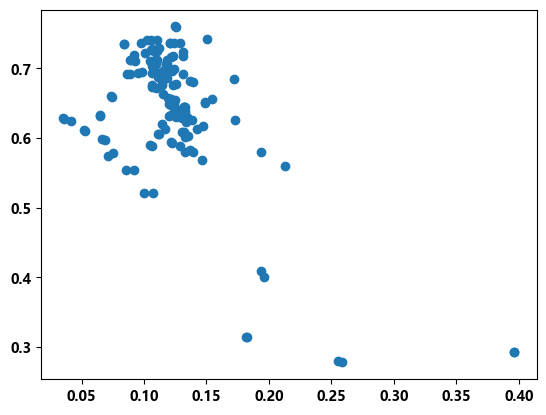

In [59]:
data = pd.read_excel("./副本e1r2.xlsx")

x=data['焦油产率']
y=data['焦渣产率']
#plt.plot(x,y,linestyle="-")

plt.scatter(x,y)
plt.show()

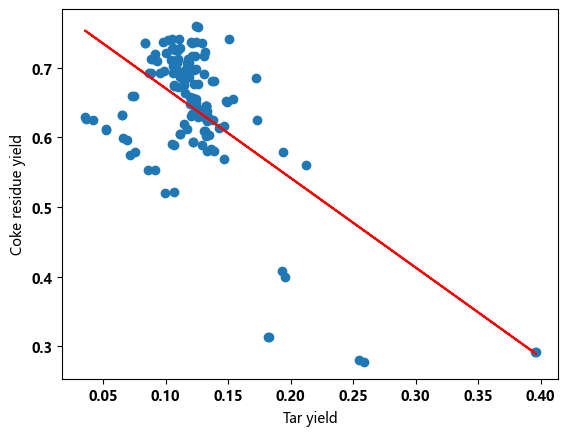

In [60]:
slope, intercept = np.polyfit(x, y, 1)

# 绘制拟合曲线
plt.scatter(x, y)

plt.rc("font",family='MicroSoft YaHei',weight="bold")

plt.xlabel("Tar yield")
plt.ylabel("Coke residue yield")

plt.plot(x, slope * x + intercept, color='red')

plt.show()

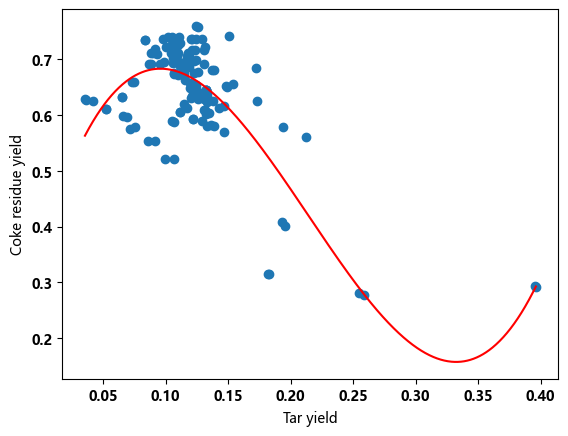

In [61]:
coefs = np.polyfit(x, y, 3)

# 使用np.poly1d函数来生成一个多项式拟合对象
poly = np.poly1d(coefs)

# 生成新的横坐标，使得拟合曲线更加平滑
new_x = np.linspace(min(x), max(x), 1000)

plt.xlabel("Tar yield")
plt.ylabel("Coke residue yield")

# 绘制拟合曲线
plt.scatter(x, y)
plt.plot(new_x, poly(new_x), color='red')

plt.show()

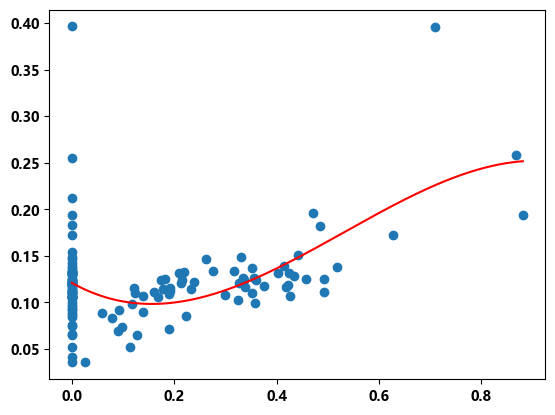

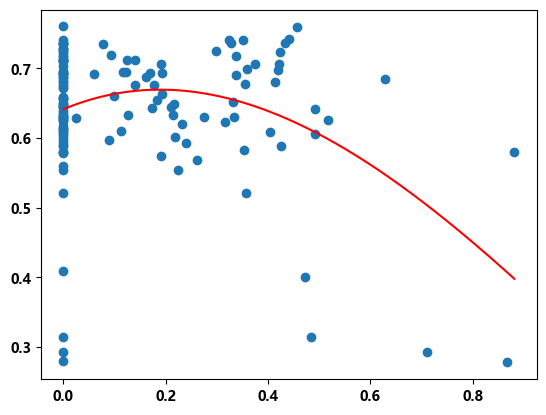

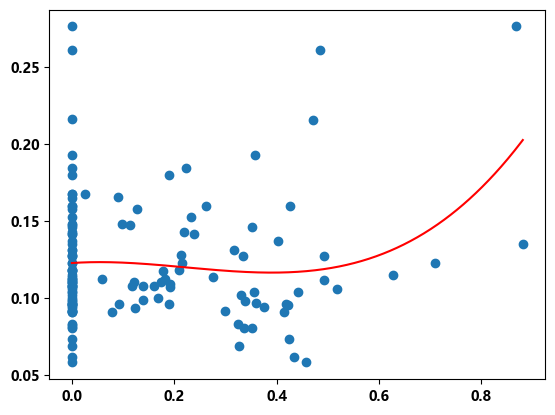

In [62]:
x1=data["正己烷不溶物（INS)g"]
y1=data["焦油产率"]
y2=data["焦渣产率"]
y3=data["水产率"]

def huatu(x,y):
    coefs = np.polyfit(x, y, 3)

# 使用np.poly1d函数来生成一个多项式拟合对象
    poly = np.poly1d(coefs)

# 生成新的横坐标，使得拟合曲线更加平滑
    new_x = np.linspace(min(x), max(x), 1000)


# 绘制拟合曲线
    plt.scatter(x, y)
    plt.plot(new_x, poly(new_x), color='red')

    plt.show()

huatu(x1,y1)
huatu(x1,y2)
huatu(x1,y3)
    

In [67]:
for i in data["配比新"]:
    data.replace( {5/100: 5,100:100,10/100:10,15/100:15,20/100:20,25/100:25,30/100:30,40/100:40,50/100:50}, inplace=True)
    
data.replace( {5/100: 5,100:100,10/100:10,15/100:15,20/100:20,25/100:25,30/100:30,40/100:40,50/100:50}, inplace=True)

# 将5/100改写为5，并生成一个新列
#df = data.assign(New_Column=data['新配比'].replace(5/100, 5))

In [68]:
data["配比新"]

0         100
1         100
2         100
3         100
4         100
        ...  
130    20/100
131    30/100
132    30/100
133    50/100
134    50/100
Name: 配比新, Length: 135, dtype: object

In [70]:
X1=data["配比"]
X2=data["正己烷不溶物（INS)g"]
Y=data["焦油产率"]

In [75]:
import pandas as pd
import numpy as np
import statsmodels.api as sm# 实现了类似于二元中的统计模型，比如ols普通最小二乘法
import statsmodels.stats.api as sms#实现了统计工具，比如t检验、F检验...
import statsmodels.formula.api as smf
import scipy

np.random.seed(991)# 随机数种子

eps = np.random.normal(0,0.05,135)# 生成噪声数据，保证后面模拟所生成的因变量的数据比较接近实际的环境

X_1 = np.c_[X1,X2]# 调用c_函数来生成自变量的数据的矩阵，按照列进行生成的；100×3的矩阵
#beta = [0.1,0.2,0.7]# 生成模拟数据时候的系数的值
beta=[0.1,0.2]
y = np.dot(X_1,beta) + eps  # 点积+噪声(dot是表示乘)
X_model = sm.add_constant(X_1)# add_constant给矩阵加上一列常量1，便于估计多元线性回归模型的截距，也是便于后面进行参数估计时的计算
model = sm.OLS(y,X_model)# 调用OLS普通最小二乘法来求解

results = model.fit()# fit拟合
results.summery()

TypeError: can't multiply sequence by non-int of type 'float'

In [76]:
import numpy as np
 
 
class LinearModel():
    def __init__(self):
        super(LinearModel, self).__init__()
 
    def fit(self, numpy_data, numpy_result):
        np_ones = np.ones((len(numpy_data), 1))
        numpy_data = np.c_[numpy_data, np_ones]
        data_transpose = numpy_data.transpose()
        A = np.matmul(data_transpose, numpy_data)
        b = np.matmul(data_transpose, numpy_result)
        self.result = np.linalg.solve(A, b)
 
    def predict(self, data):
        numpy_result = np.zeros(len(data))
        for index, datas in enumerate(data):
            numpy_result[index] = np.sum(
                [data * self.result[index] for index, data in enumerate(datas)]) + self.result[-1]
        return numpy_result
 
 
if __name__ == '__main__':
    # 数据集准备
    data1 = X1
    data2 = X2
    result_tranpose = Y
    original_transpose = np.concatenate((data1, data2))
    data_original = original_transpose.transpose()
    data_result = result_tranpose.transpose()
    # print(data_original)
    # print(data_result)
 
    # 建模
    linear = LinearModel()
    linear.fit(data_original, data_result)
    print(linear.result) # 计算的系数值
 
    # 预测
    predict = linear.predict([[3.6, 1], [3.7, 2]])
    print(predict)

TypeError: can't multiply sequence by non-int of type 'str'

In [86]:
data2=pd.read_excel("./副本e1r3.xlsx")
x_1=data2["配比"]
y_1=data2["焦油产率"]

In [99]:
x_1=np.array(x_1)
y_1=np.array(y_1)

In [96]:
import torch
import matplotlib.pyplot as plt

# 设置CPU生成随机数的种子，方便下次复现实验结果。
torch.manual_seed(9)

# 设置学习率为0.1
lr = 0.05

# 创建训练数据
# 创建二维列表，
#x = torch.rand(20, 1)*10
#y = 2*x + (5 + torch.randn(20, 1))

# 随机参数w和b
w = torch.randn((1), requires_grad=True)
b = torch.randn((1), requires_grad=True)



In [100]:
x_11=torch.from_numpy(x_1)
y_11=torch.from_numpy(y_1)

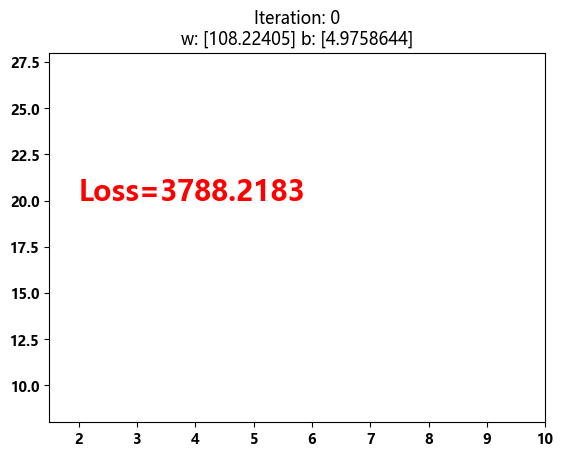

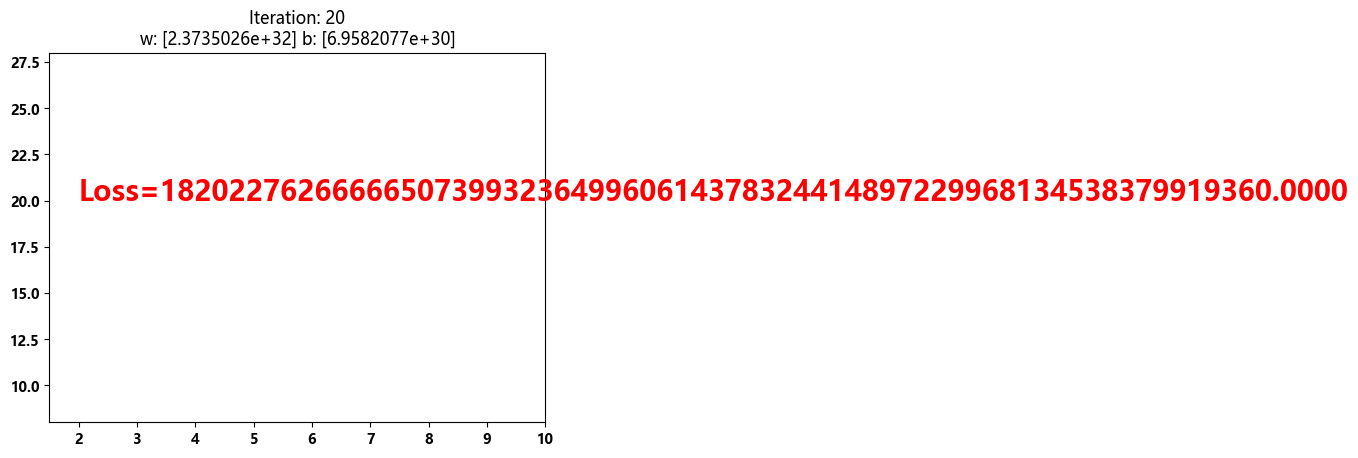

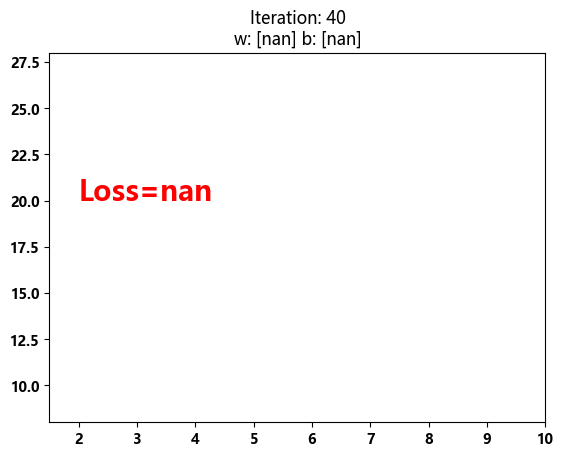

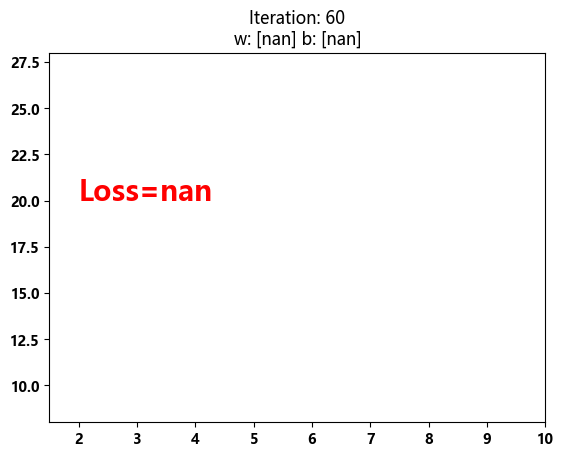

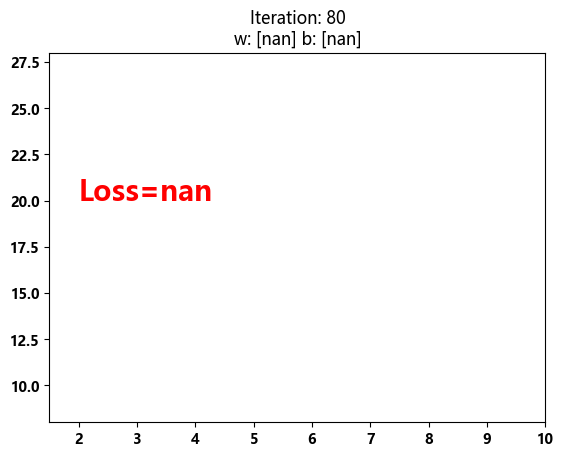

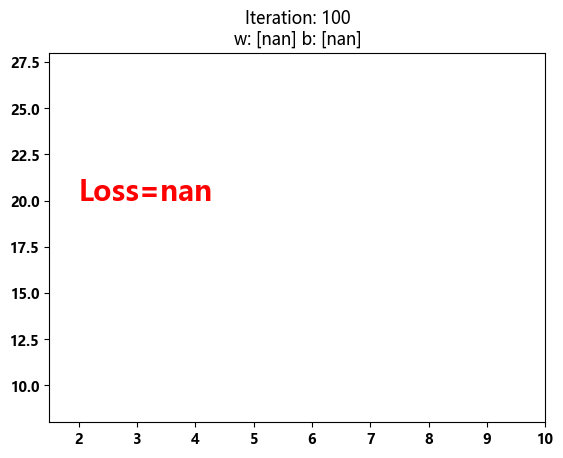

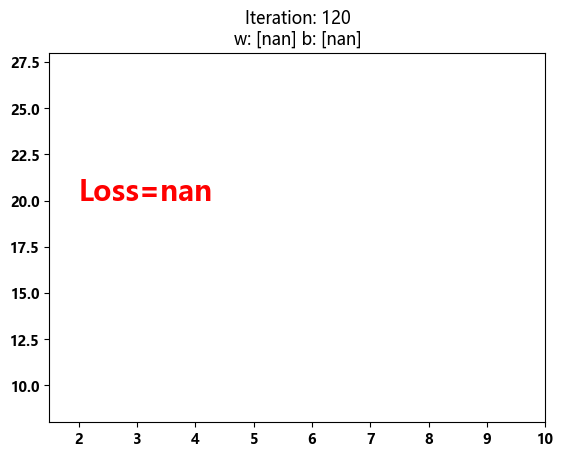

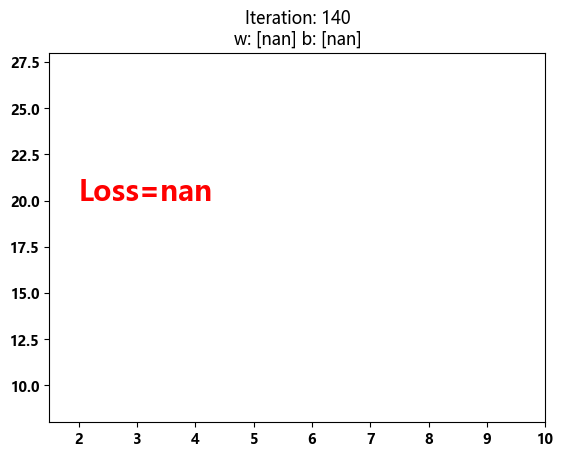

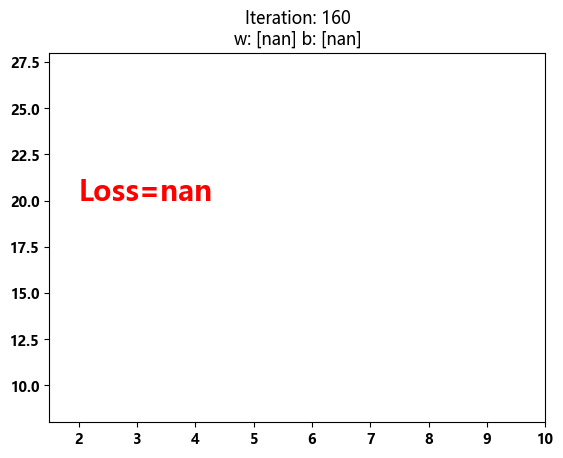

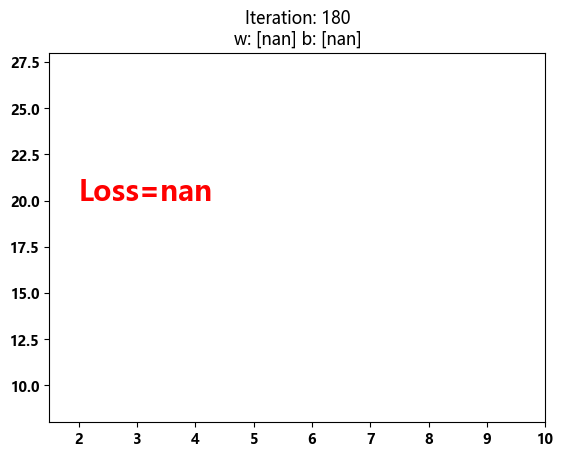

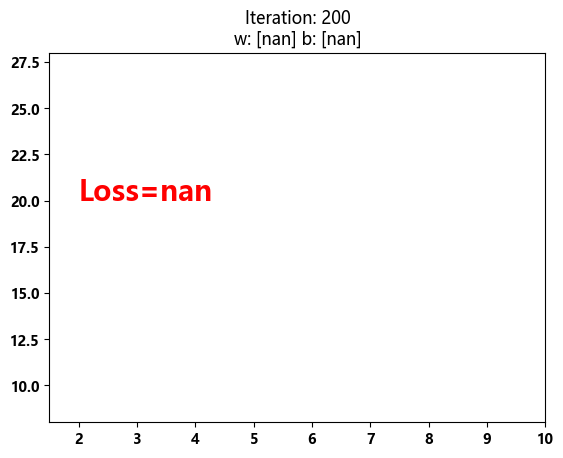

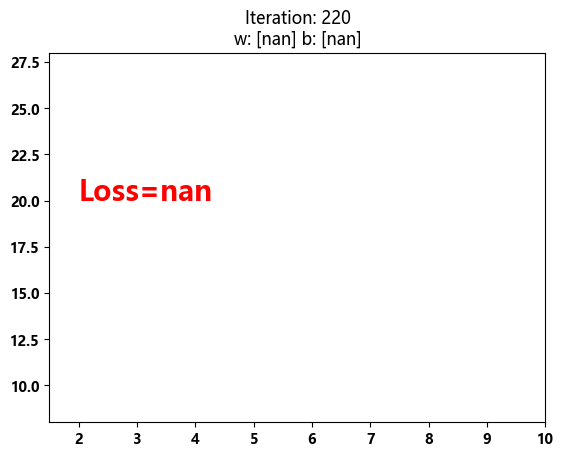

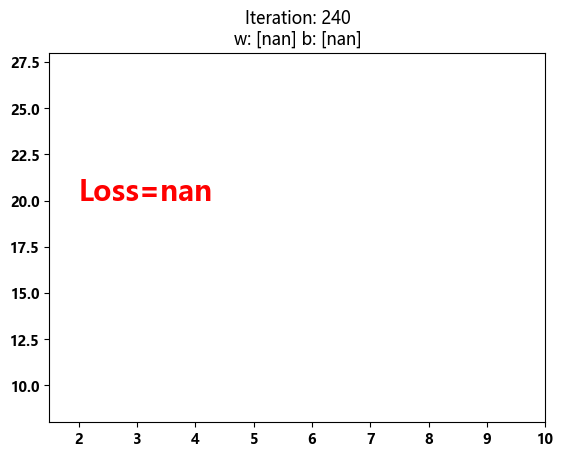

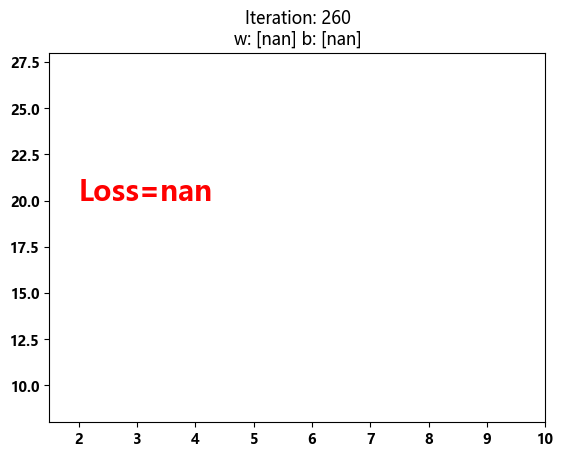

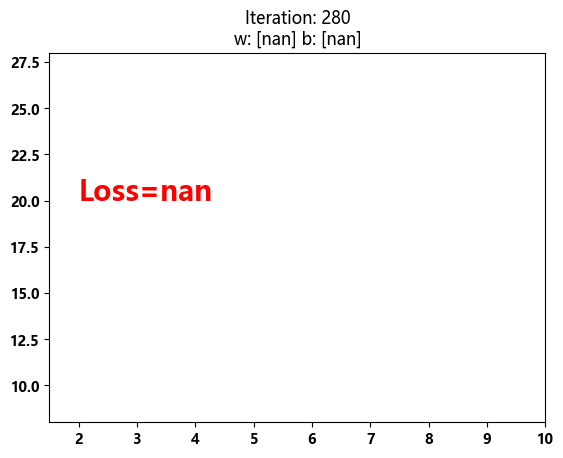

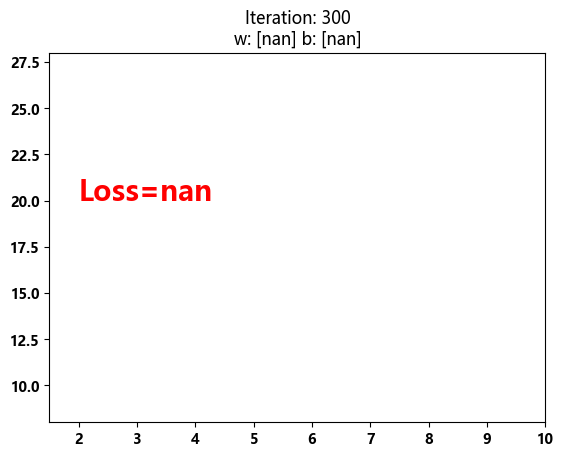

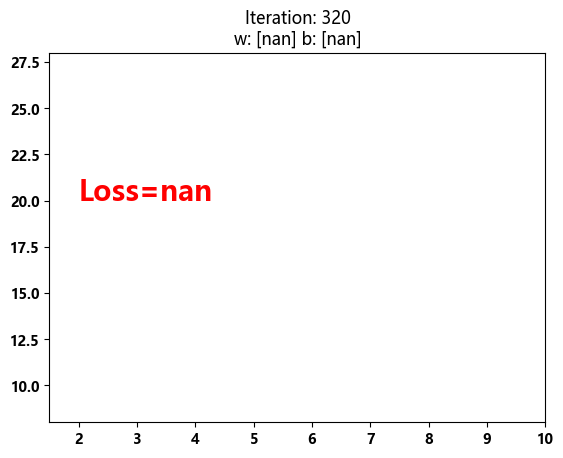

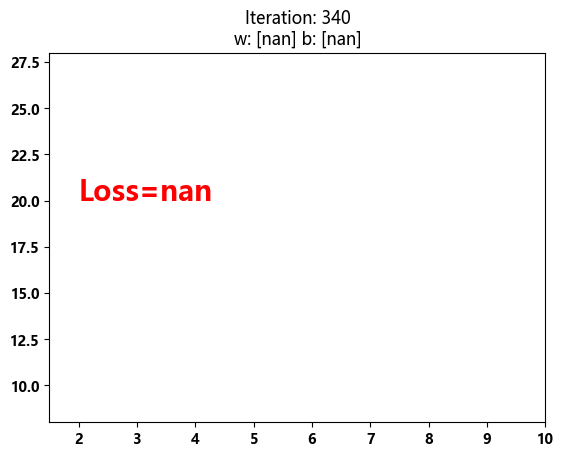

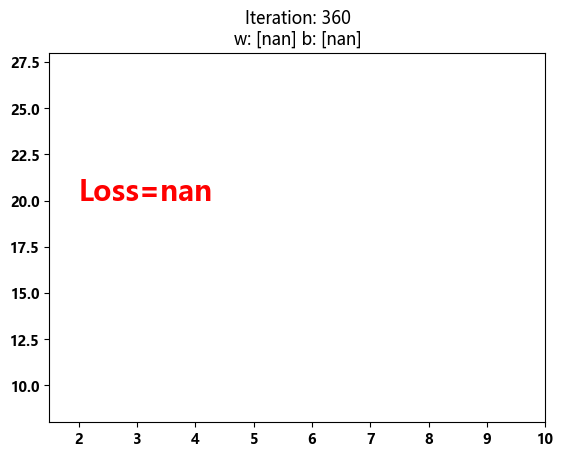

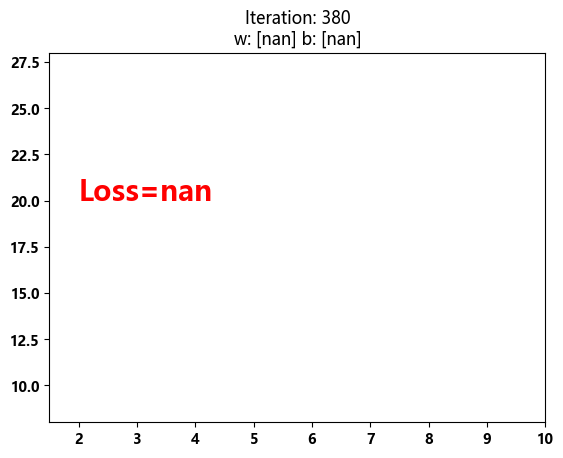

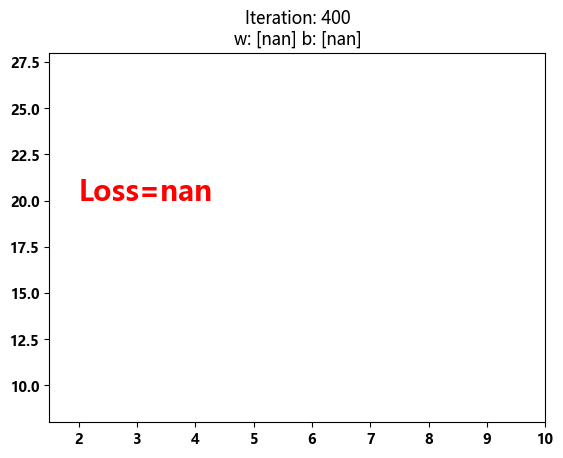

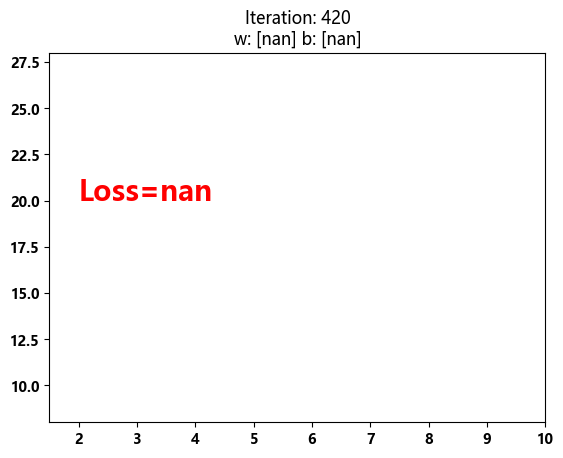

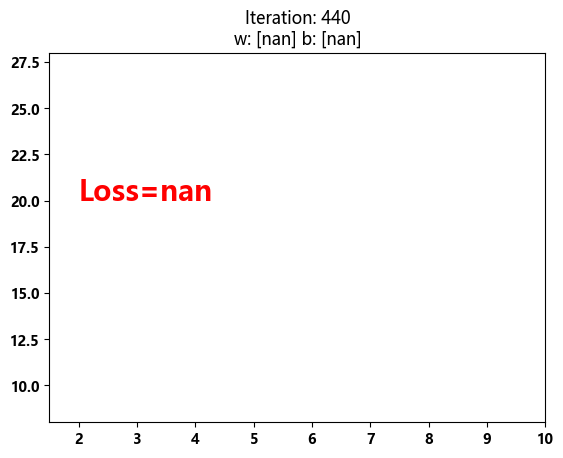

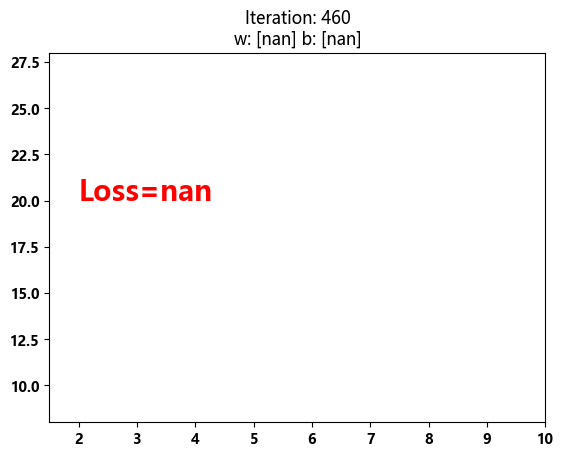

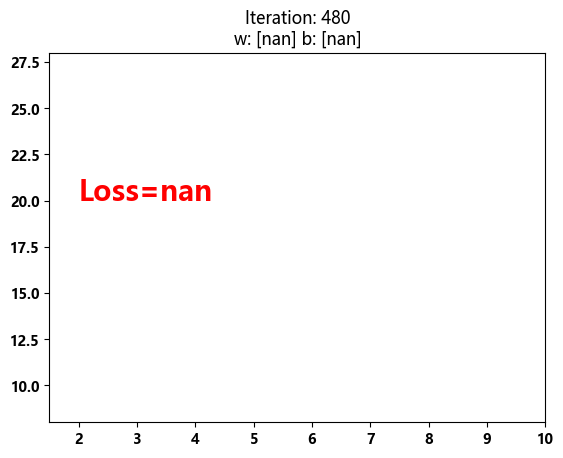

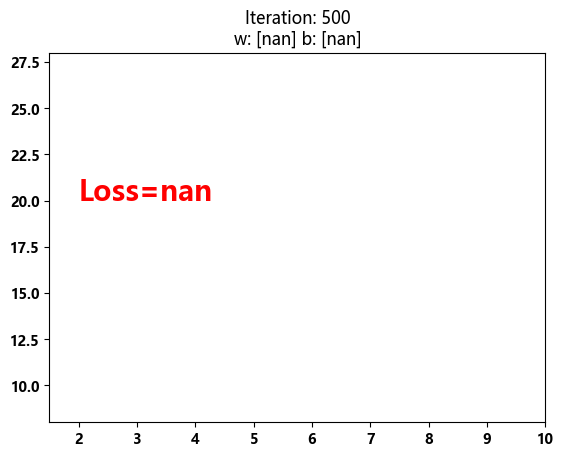

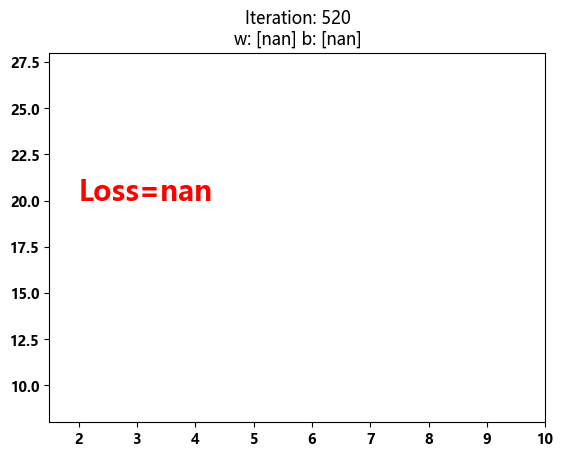

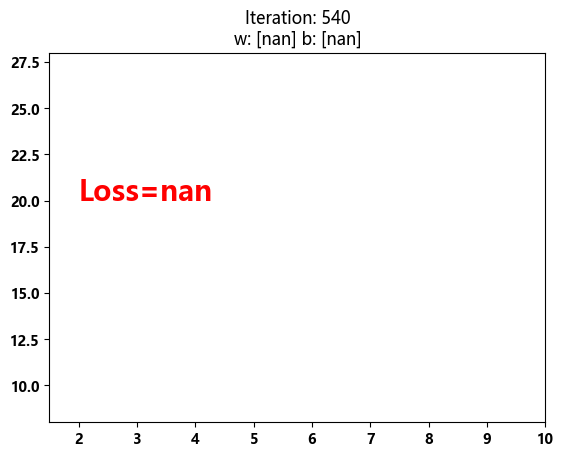

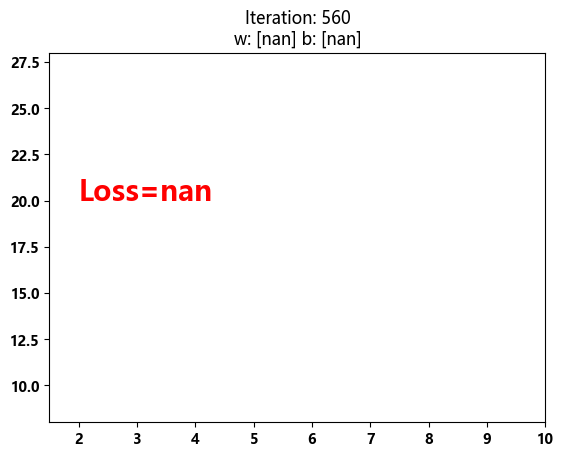

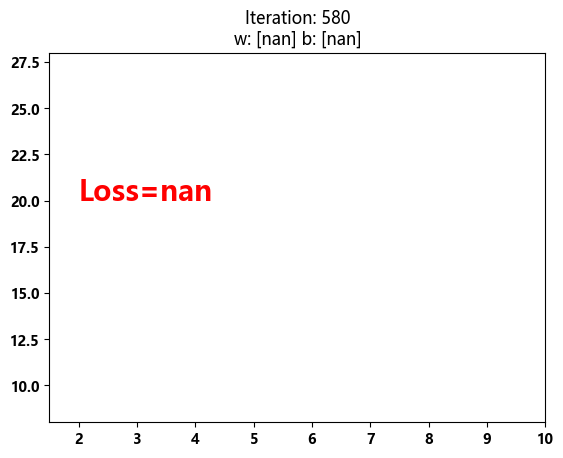

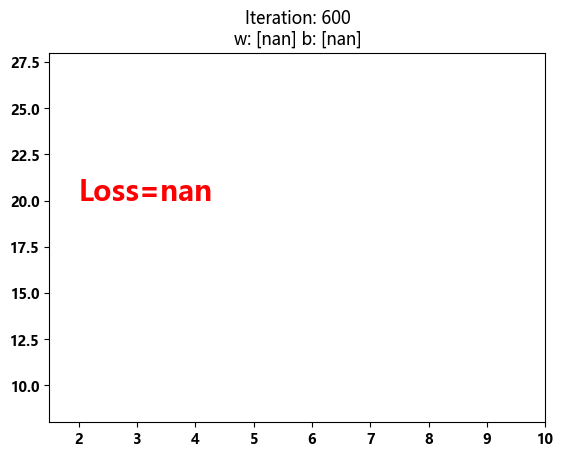

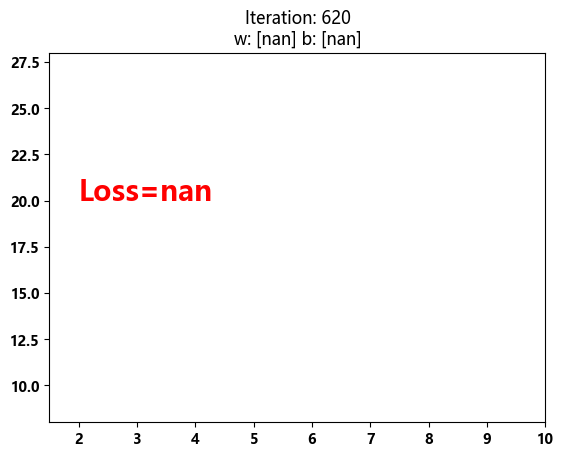

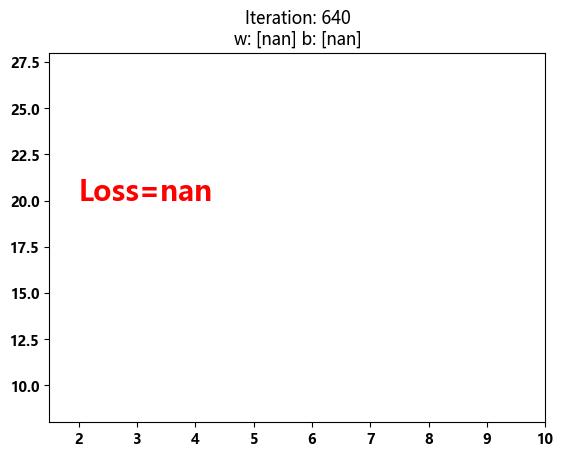

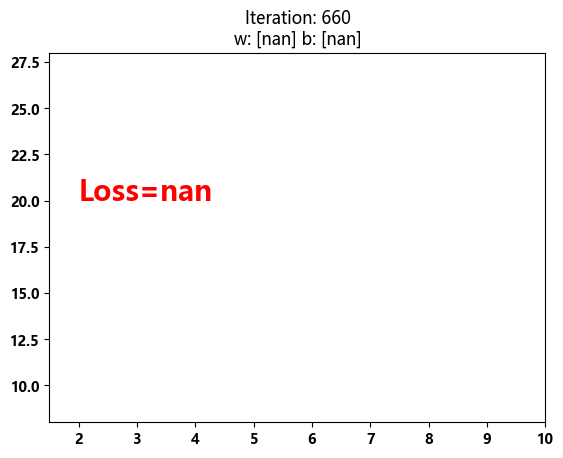

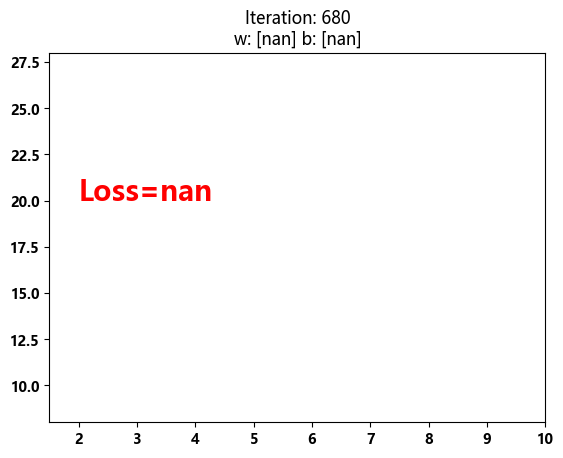

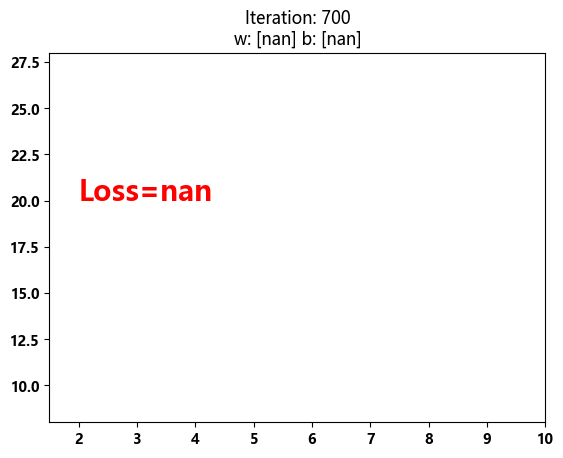

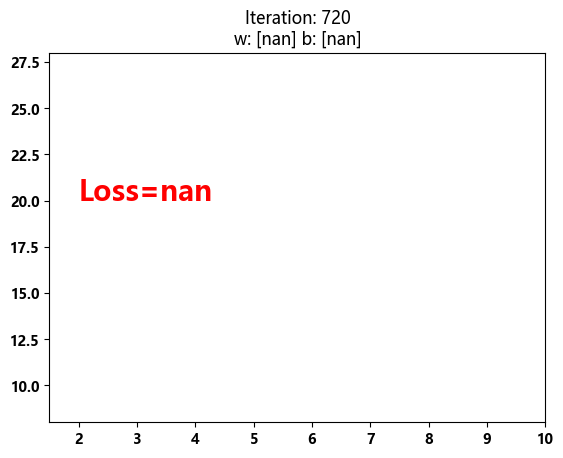

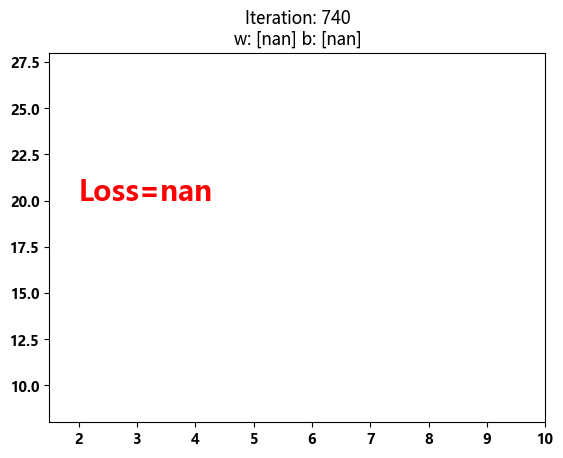

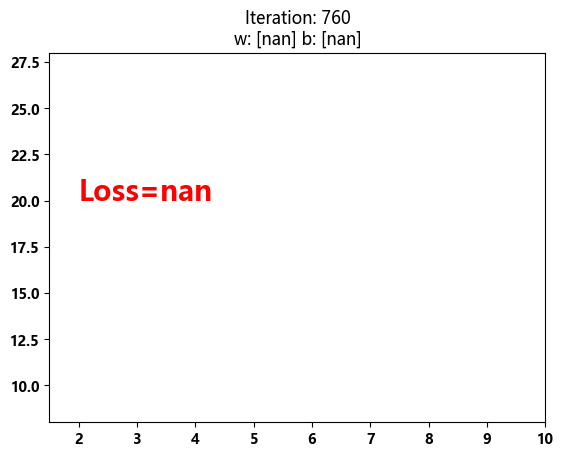

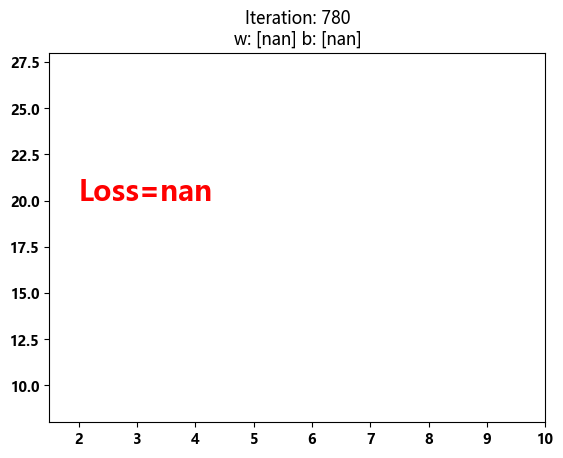

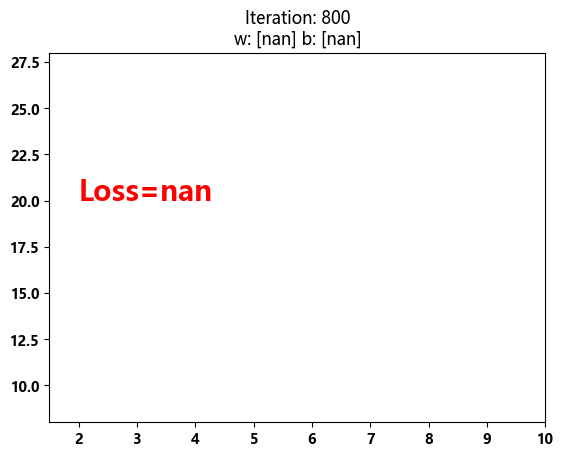

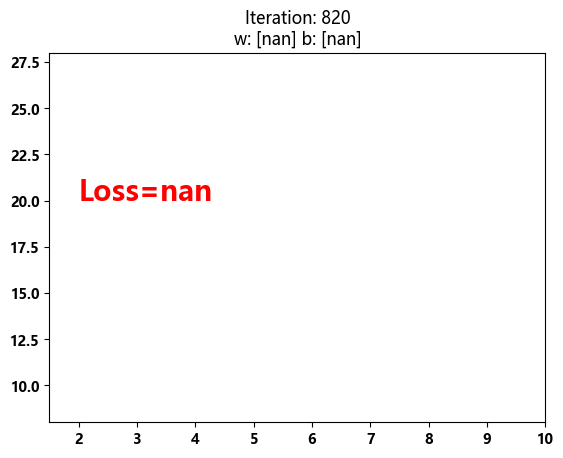

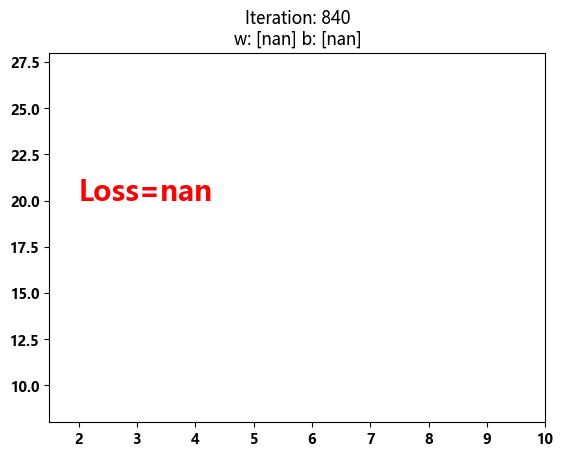

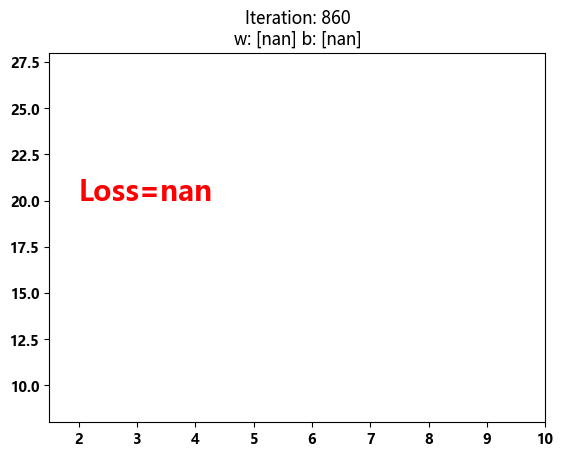

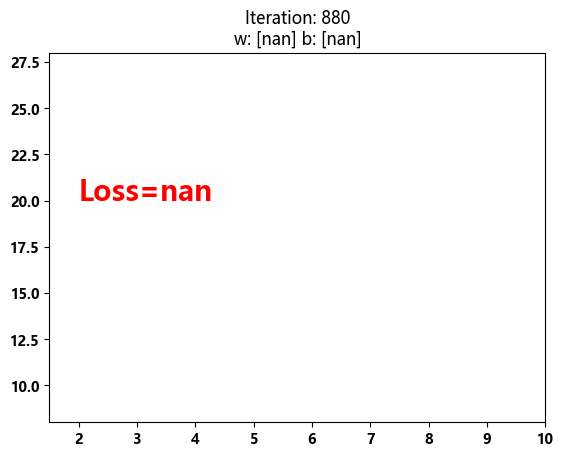

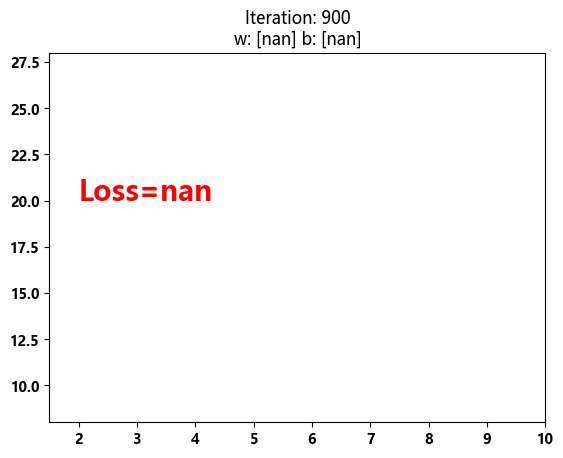

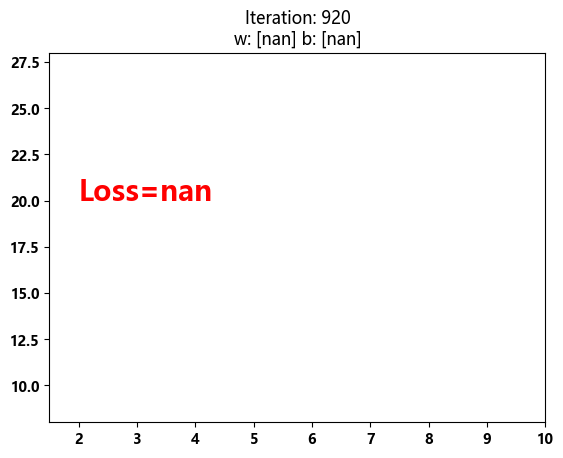

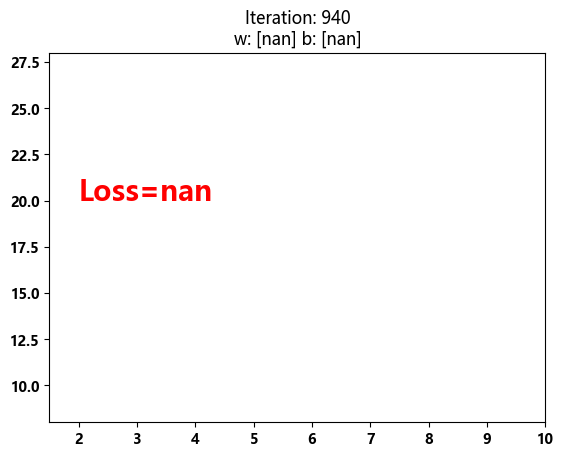

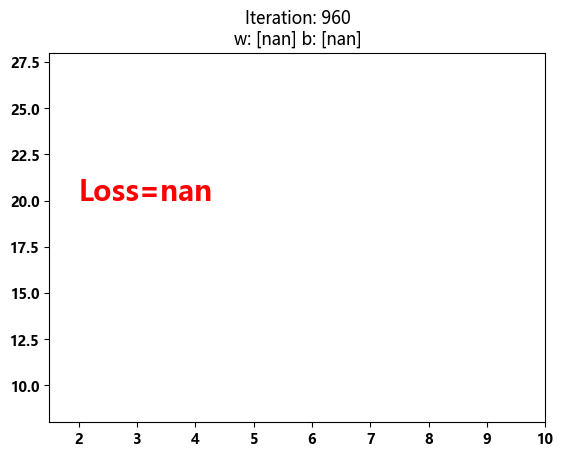

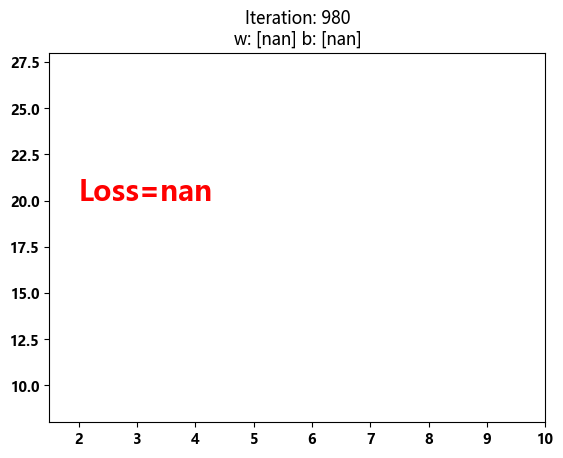

In [103]:
for i in range(1000):
    # 前向传播
    # torch.mul作element-wise的矩阵点乘，维数不限，可以矩阵乘标量
    # 当a, b维度不一致时，会自动填充到相同维度相点乘。
    wx = torch.mul(w, x_11)
    # 支持广播相加
    y_pred = torch.add(wx, b)
    
    # 计算MSE Loss
    # 反向传播， ✖2分之一是为了方便求导
    loss = (0.5 * (y_11 - y_pred) ** 2).mean()
    
    # 反向传播, 计算当前梯度
    loss.backward()
    
    # 更新参数
    # w = w- LR*w.grad
    # b = b- LR*w.grad
    
    # 函数形式：torch.sub(input, other, *, alpha=1, out=None)
    # 参数解读：
    #  input: 输入的被减数，格式为tensor格式
    #  other：输入的减数
    #  alpha:与上面other参数搭配使用，用来与other相乘，当使用torch.sub()函数时不指定alpha的值时，alpha默认为1
    #  out： 指定torch.sub()输出值被赋给的变量，可不指定。
    
    # 然而
    # torch.sub_()功能与torch.sub()相同，区别在与torch.sub_()是torch.sub()的in-place操作版本。
    
    b.data.sub_(lr * b.grad)
    w.data.sub_(lr * w.grad)
    
     # 绘图
    if i % 20 == 0:
        plt.cla()   # 防止社区版可视化时模型重叠2020-12-15
        plt.scatter(x_11.data.numpy(), y_11.data.numpy())
        plt.plot(x_11.data.numpy(), y_pred.data.numpy(), 'r-', lw=5)
        plt.text(2, 20, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.xlim(1.5, 10)
        plt.ylim(8, 28)
        plt.title("Iteration: {}\nw: {} b: {}".format(i, w.data.numpy(), b.data.numpy()))
        plt.pause(0.5)

        if loss.data.numpy() < 1:
            break
    plt.show()
